In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
import mglearn

In [16]:
data=pd.read_csv('data.csv')



In [17]:
data.head()

Unnamed: 0                                          file_name  \
0           0  /home/v-osipov/PycharmProjects/vba/data/benign...   
1           1  /home/v-osipov/PycharmProjects/vba/data/malici...   
2           2  /home/v-osipov/PycharmProjects/vba/data/benign...   
3           3  /home/v-osipov/PycharmProjects/vba/data/malici...   
4           4  /home/v-osipov/PycharmProjects/vba/data/benign...   

                                                text  virus  
0  " Vimball Archiver by Charles E. Campbell, Jr....    0.0  
1  Attribute VB_Name = "Sheet1"\nAttribute VB_Bas...    1.0  
2  Option Explicit\n\nSub testProgramm()\n\tdim o...    0.0  
3  Attribute VB_Name = "ThisWorkbook"\nAttribute ...    1.0  
4  VERSION 5.00\nObject = "{5F37140E-C836-11D2-BE...    0.0

In [18]:
# data.set_index(data['file_name'],inplace=True)
data.drop(columns=['Unnamed: 0','file_name'],inplace=True)

In [19]:
data.head()

text  virus
0  " Vimball Archiver by Charles E. Campbell, Jr....    0.0
1  Attribute VB_Name = "Sheet1"\nAttribute VB_Bas...    1.0
2  Option Explicit\n\nSub testProgramm()\n\tdim o...    0.0
3  Attribute VB_Name = "ThisWorkbook"\nAttribute ...    1.0
4  VERSION 5.00\nObject = "{5F37140E-C836-11D2-BE...    0.0

In [20]:
data['text']=data['text'].astype(str)

In [21]:
X_train, X_test, y_train, y_test = train_test_split(data['text'].values,data['virus'].values,test_size=0.25, random_state=42)


In [22]:
from sklearn.feature_extraction.text import CountVectorizer

In [24]:
text_train=X_train
text_test=X_test


3424

In [25]:
vect = CountVectorizer(min_df=5).fit(text_train)
X_train = vect.transform(text_train)
print("X_train с min_df: {}".format(repr(X_train)))

X_train с min_df: <3424x21684 sparse matrix of type '<class 'numpy.int64'>'
	with 517055 stored elements in Compressed Sparse Row format>


In [26]:
feature_names = vect.get_feature_names()
print("Первые 50 признаков:\n{}".format(feature_names[:50]))
print("Признаки с 20010 по 20030:\n{}".format(feature_names[20010:20030]))
print("Каждый 700-й признак:\n{}".format(feature_names[::700]))

Первые 50 признаков:
['00', '000', '0000', '00000', '000000', '0000000', '00000000', '000000000', '0000000000', '000000000046', '00000000h', '00000001h', '00000002h', '00000003h', '00000004h', '00000005h', '00000006h', '00000007h', '00000008h', '00000009h', '0000000ah', '0000000bh', '0000000ch', '0000000dh', '0000000eh', '0000000fh', '00000010h', '00000011h', '00000012h', '00000013h', '00000014h', '00000015h', '00000016h', '00000017h', '00000018h', '00000019h', '0000001ah', '0000001bh', '0000001ch', '0000001dh', '0000001eh', '0000001fh', '00000020h', '00000023h', '00000024h', '00000028h', '0000002ch', '00000030h', '00000034h', '00000036h']
Признаки с 20010 по 20030:
['vk_numpad5', 'vk_numpad6', 'vk_numpad7', 'vk_numpad8', 'vk_numpad9', 'vk_pause', 'vk_print', 'vk_prior', 'vk_rbutton', 'vk_right', 'vk_select', 'vk_separator', 'vk_shift', 'vk_snapshot', 'vk_space', 'vk_subtract', 'vk_tab', 'vk_up', 'vk_z', 'vkey']
Каждый 700-й признак:
['00', '1230', '1841', '2443', '306', '3682', '4299'

In [27]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
scores = cross_val_score(LogisticRegression(solver='newton-cg'), X_train, y_train, cv=5)
print("Средняя правильность перекр проверки: {:.2f}".format(np.mean(scores)))

Средняя правильность перекр проверки: 0.93


In [28]:
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10]}
grid = GridSearchCV(LogisticRegression(solver='newton-cg'), param_grid, cv=5)
grid.fit(X_train, y_train)
print("Наилучшее значение перекрестной проверки: {:.2f}".format(grid.best_score_))
print("Наилучшие параметры: ", grid.best_params_)

Наилучшее значение перекрестной проверки: 0.93
Наилучшие параметры:  {'C': 0.1}


In [29]:
text_test=X_test.astype(str)
X_test = vect.transform(text_test)
print("Правильность на тестовом наборе: {:.2f}".format(grid.score(X_test, y_test)))

Правильность на тестовом наборе: 0.93


In [30]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import make_pipeline
pipe = make_pipeline(TfidfVectorizer(min_df=5, norm=None),
LogisticRegression(solver='newton-cg'))
param_grid = {'logisticregression__C': [0.001, 0.01, 0.1, 1, 10]}
grid = GridSearchCV(pipe, param_grid, cv=5)
grid.fit(text_train, y_train)
print("Наилучшее значение перекр проверки: {:.2f}".format(grid.best_score_))

Наилучшее значение перекр проверки: 0.93


In [31]:
vectorizer = grid.best_estimator_.named_steps["tfidfvectorizer"]
# преобразуем обучающий набор данных
X_train = vectorizer.transform(text_train)
# находим максимальное значение каждого признака по набору данных

max_value = X_train.max(axis=0).toarray().ravel()
sorted_by_tfidf = max_value.argsort()
# получаем имена признаков
feature_names = np.array(vectorizer.get_feature_names())
print("Признаки с наименьшими значениями tfidf:\n{}".format(
feature_names[sorted_by_tfidf[:20]]))
print("Признаки с наибольшими значениями tfidf: \n{}".format(
feature_names[sorted_by_tfidf[-20:]]))
X_test=vectorizer.transform(text_test)

Признаки с наименьшими значениями tfidf:
['vb_creatable' 'vb_exposed' 'vb_globalnamespace' 'vb_base'
 'vb_templatederived' 'vb_customizable' '00020820' 'vb_predeclaredid'
 '00020819' '1normal' 'multiuse' 'worksheet_beforerightclick' 'linktopic'
 'a738' 'fcfb3d2a' '08002b3371b5' 'a0fa' 'archiver' 'usevimball'
 'createitem']
Признаки с наибольшими значениями tfidf: 
['single' 'way' 'coerce' 'give' '13' 'line' '30' 'litdi2' 'stag'
 'information' 'system' 'ld' 'facility' 'animalia' 'jun' 'dry' 'fine'
 'integrated' 'none' 'taxonomy']


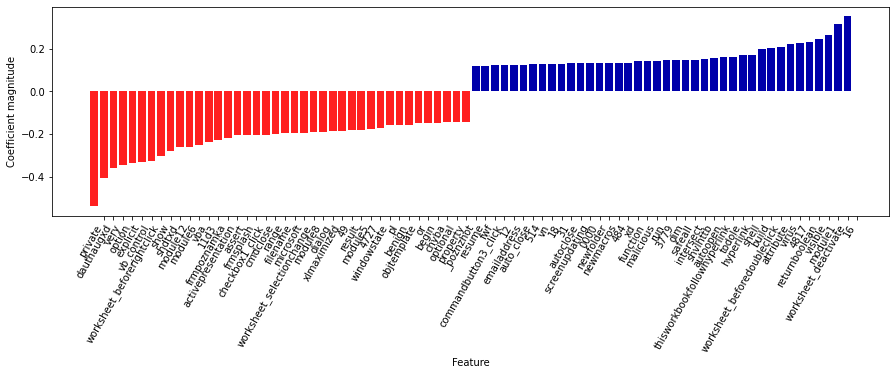

In [32]:
mglearn.tools.visualize_coefficients(
grid.best_estimator_.named_steps["logisticregression"].coef_,
feature_names, n_top_features=40)

In [33]:
model=LogisticRegression(solver='newton-cg',C=0.1)

In [34]:
vectorizer =grid.best_estimator_.named_steps["tfidfvectorizer"]

In [35]:
X_train = vectorizer.transform(text_train)

X_test=vectorizer.transform(text_test)

In [36]:
model.fit(X_train,y_train)


LogisticRegression(C=0.1, solver='newton-cg')

In [37]:
print("Правильность на тестовом наборе: {:.2f}".format(model.score(X_test, y_test)))

Правильность на тестовом наборе: 0.93


In [46]:
data.loc[400:450,'text'].values

array(['\n\' Процедура, которая заменяет названия месяцев\nSub DateWizzard2()\n\n\' Модель датизатора лежит здесь: https://docs.google.com/spreadsheets/d/1t3m6UfmC_jD2kmaUirafpR1-hYx6Gz5Fl5cEO1VjgOg/edit?usp=sharing\n\' Создание массива с названиями месяцев\n\n\' Объектная модель Scripting не работает на Mac, поэтому вводится проверка системы\n  #If Mac = False Then\n    Dim d\n    Set d = CreateObject("Scripting.Dictionary")\n\n  #Else\n\' На Mac нет объекта Scripting, поэтому используется сторонняя реализация класса\n\' Dictionary: https://sysmod.wordpress.com/2011/11/02/dictionary-class-in-vba-instead-of-scripting-dictionary/\n\' Дополнительно установить ещё один класс: http://www.sysmod.com/KeyValuePair.cls\n    Dim d As Dictionary\n    Set d = New Dictionary\n  #End If\n\n  d.Add "XII", "декабря"\n  d.Add "XI", "ноября"\n  d.Add "X", "октября"\n  d.Add "VIII", "августа"\n  d.Add "VII", "июля"\n  d.Add "VI", "июня"\n  d.Add "V", "мая"\n  d.Add "IX", "сентября"\n  d.Add "IХ", "сентя